<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Python_Linear_Discriminant_Analysis_(LDA)_for_Predicting_Shipping_Outcomes_in_a_Warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  900 non-null    float64
 1   Feature2  1000 non-null   float64
 2   Label     1000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.6+ KB
None

Data Description (with dirty data):
         Feature1     Feature2
count  900.000000  1000.000000
mean    50.210781    37.054181
std      9.886455    25.449026
min     17.587327    15.298057
25%     43.479669    27.254400
50%     50.197189    30.738651
75%     56.570513    34.754747
max     88.527315   145.965538

Cleaning missing values...

Handling outliers in Feature2...

Data Overview After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-nul

<ipython-input-2-c6788da96fc3>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Feature1'].fillna(data['Feature1'].mean(), inplace=True)  # I am replacing NaN with the mean for Feature1.
<ipython-input-2-c6788da96fc3>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

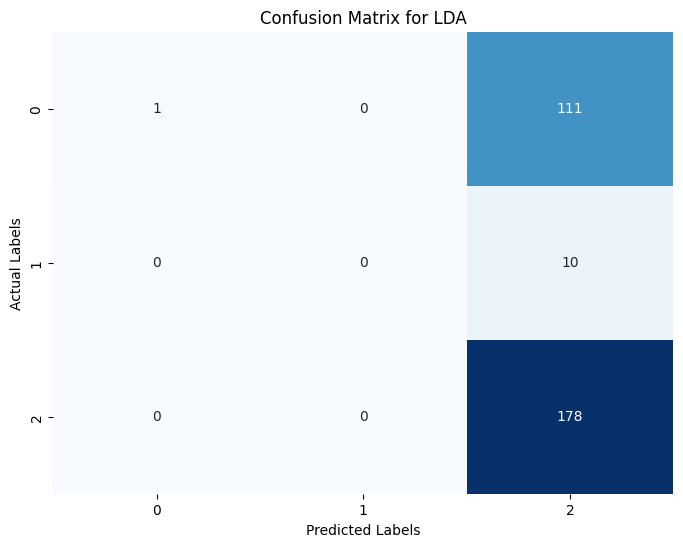


Fitting the Quadratic Discriminant Analysis model...


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:972: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:972: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:975: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


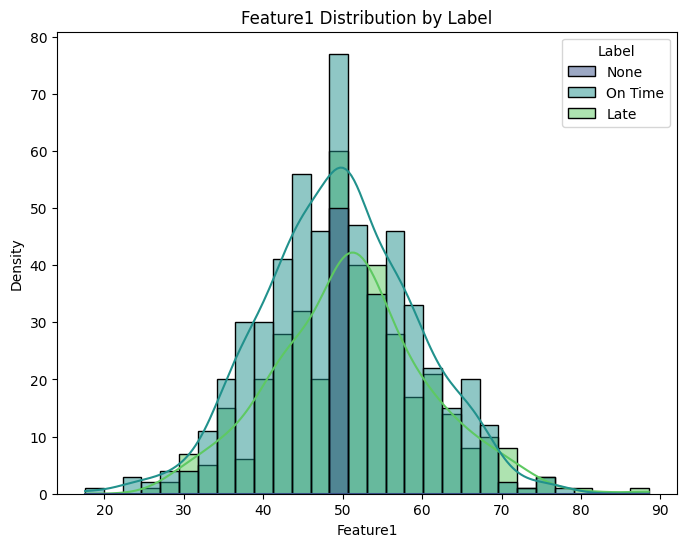


Fitting the Naive Bayes model...


<ipython-input-2-c6788da96fc3>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm')


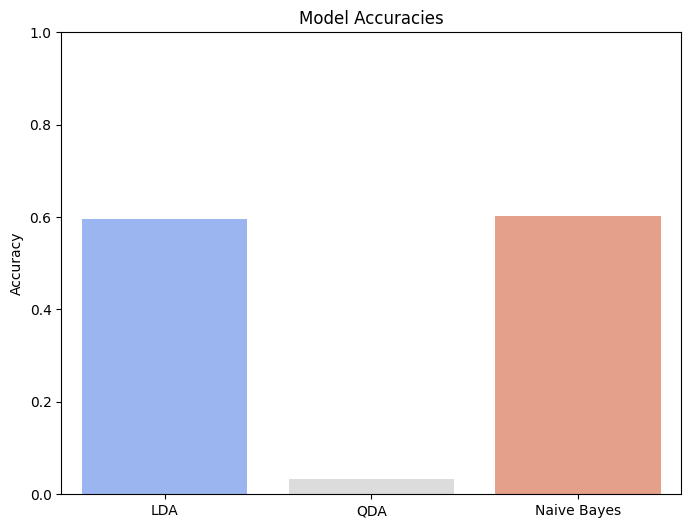


Summary of Model Accuracies:
LDA: 0.60
QDA: 0.03
Naive Bayes: 0.60


In [2]:
# I need to import the libraries that will help me handle data, build models, and visualize results.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# To ensure my results are reproducible, I will set a random seed.
np.random.seed(42)

# Now, I am creating synthetic data to simulate the scenario of predicting shipping outcomes.
# This dataset will have intentional issues to simulate real-world data challenges.
n_samples = 1000
feature1 = np.random.normal(loc=50, scale=10, size=n_samples)  # Delivery condition metric
feature2 = np.random.normal(loc=30, scale=5, size=n_samples)   # Efficiency score
labels = np.random.choice(['On Time', 'Late'], size=n_samples, p=[0.6, 0.4])  # Shipment outcome

# I want to make the data more realistic by introducing some "dirty" elements.
# Specifically, I will introduce missing values and outliers.
feature1[::10] = np.nan  # I will set every 10th value in Feature1 to NaN.
feature2[::15] += 100    # I want to add extreme outliers to every 15th value in Feature2.
labels[::20] = None      # I will make every 20th label missing to simulate real-world data issues.

# Now, I will combine all these features into a DataFrame so that it’s easier for me to manipulate and clean.
data = pd.DataFrame({
    'Feature1': feature1,
    'Feature2': feature2,
    'Label': labels
})

# Before diving into modeling, I need to take a closer look at the dataset to identify its issues.
print("Initial Data Overview:")
print(data.info())  # I want to understand the structure of the dataset, including missing values.
print("\nData Description (with dirty data):")
print(data.describe())  # This will help me observe potential outliers and anomalies.

# I need to clean the data to ensure that my models are not affected by missing values or outliers.
# First, I will handle missing values.
print("\nCleaning missing values...")
data['Feature1'].fillna(data['Feature1'].mean(), inplace=True)  # I am replacing NaN with the mean for Feature1.
data['Label'].fillna('Unknown', inplace=True)  # For missing labels, I am using 'Unknown' as a placeholder.

# Next, I need to address the outliers in Feature2.
# To do this, I will calculate the interquartile range (IQR) and replace outliers with the median.
print("\nHandling outliers in Feature2...")
q1 = data['Feature2'].quantile(0.25)
q3 = data['Feature2'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data['Feature2'] = np.where(
    (data['Feature2'] < lower_bound) | (data['Feature2'] > upper_bound),
    data['Feature2'].median(),
    data['Feature2']
)

# After cleaning, I need to ensure that the dataset is ready for modeling.
print("\nData Overview After Cleaning:")
print(data.info())  # This will confirm that missing values have been handled.
print("\nData Description (after cleaning):")
print(data.describe())  # I want to confirm that outliers are no longer skewing the statistics.

# Now, I will split the data into training and test sets to evaluate my models.
X = data[['Feature1', 'Feature2']].values
y = data['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# I will begin with Linear Discriminant Analysis (LDA) as my first classifier.
print("Fitting the Linear Discriminant Analysis model...")
lda = LinearDiscriminantAnalysis(store_covariance=True)  # I want to inspect the covariance matrix later.
lda.fit(X_train, y_train)  # I am training the LDA model on the cleaned training data.
lda_predictions = lda.predict(X_test)

# I am curious about how the LDA model performed, so I will evaluate it using a confusion matrix and accuracy score.
lda_confusion_matrix = confusion_matrix(y_test, lda_predictions)
lda_accuracy = accuracy_score(y_test, lda_predictions)

# To visualize the results, I will create a heatmap of the confusion matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(lda_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for LDA")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

# Now, I want to see if Quadratic Discriminant Analysis (QDA) performs better on this dataset.
print("\nFitting the Quadratic Discriminant Analysis model...")
qda = QuadraticDiscriminantAnalysis(store_covariance=True)  # I am using class-specific covariance matrices here.
qda.fit(X_train, y_train)
qda_predictions = qda.predict(X_test)

# I will evaluate the QDA model as well and compare its accuracy to the LDA model.
qda_confusion_matrix = confusion_matrix(y_test, qda_predictions)
qda_accuracy = accuracy_score(y_test, qda_predictions)

# Next, I want to visualize how the features are distributed across the labels.
plt.figure(figsize=(8, 6))
sns.histplot(data, x='Feature1', hue='Label', kde=True, palette='viridis', bins=30)
plt.title("Feature1 Distribution by Label")
plt.xlabel("Feature1")
plt.ylabel("Density")
plt.show()

# Finally, I will fit a Naive Bayes model for comparison.
print("\nFitting the Naive Bayes model...")
nb = GaussianNB()  # I chose Gaussian Naive Bayes because it assumes normally distributed features.
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)

# Evaluating the Naive Bayes model.
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# I want to compare the accuracy of all three models side by side.
accuracies = {
    'LDA': lda_accuracy,
    'QDA': qda_accuracy,
    'Naive Bayes': nb_accuracy
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm')
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Printing a summary of the model accuracies for reference.
print("\nSummary of Model Accuracies:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.2f}")















